## Topic Modelling

Understanding the topic of theme of discussion where documents are mixture of topics in form of word distribution


using Gensim's LDA (Latent Dirichlet Allocation) model to model topics 
by using gensim.models.ldamodel.LdaModel constructor to estimate LDA model parameters on the corpus.

LDA provides solution of an optimization function using complex derivatives of generative model

Topic modelling is used for EDA to understand the types of conversation happening in the corpus

In [ ]:
import pickle
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora

# Load the list of documents
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform to doc-term matrix
X = vect.fit_transform(newsgroup_data)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [ ]:
# Using gensim.models.ldamodel.LdaModel constructor to estimate 

from gensim.models import LdaModel

ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=10, 
                                           random_state=34,
                                           update_every=1,
                                           chunksize=100,
                                           passes=25,
                                           alpha='auto',
                                           per_word_topics=True)
ldamodel


In [ ]:
from pprint import pprint

In [ ]:
# Print the Keyword in the 10 topics with probability
pprint(ldamodel.print_topics())
doc_lda = ldamodel[corpus]

### topic names

From the list of the following given topics, assign topic names to the topics you found. 

Topics: Health, Science, Automobiles, Politics, Government, Travel, Computers & IT, Sports, Business, Society & Lifestyle, Religion, Education.


### Word Clouding



In [ ]:
%matplotlib inline

In [ ]:
#pip install wordcloud

In [ ]:
import os
from os import path
from wordcloud import WordCloud
from nltk.corpus import stopwords
#stop words
stop_words = set(stopwords.words('english'))

#Call original text
text = open('Alice.txt',encoding="utf8").read()

# Clean text
text = ' '.join([word for word in text.split() if word not in stop_words])

# Generate a word cloud image
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

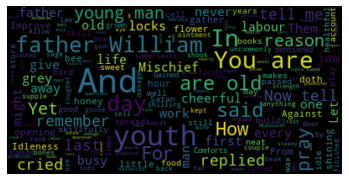

In [2]:
import os
#from os import path
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
#stop words
#stop_words = set(stopwords.words('english'))

#Call original text
text = open('Alice.txt',encoding="utf8").read()

# Clean text
#text = ' '.join([word for word in text.split() if word not in stop_words])

# Generate a word cloud image
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords = STOPWORDS,max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()